In [1]:
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")
import requests
import numpy as np
import re
import pandas as pd
import seaborn as sns

In [2]:
url="https://www.flipkart.com/search?q=tv&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [3]:
headers={'User-Agent':'Mozilla/5.0'}
page=requests.get(url,headers=headers)
page

<Response [200]>

In [4]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css"/> <meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property

In [5]:
soup= BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/atlas.chunk.8dd48d.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.c48a12.css" rel="stylesheet"/><link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.e4e719.css" rel="stylesheet"/> <meta content="text/html; charset=utf-8" http-equiv="Content-type"/><meta content="IE=Edge" http-equiv="X-UA-Compatible"/><meta content="102988293558" property="fb:page_id"/><meta content="658873552,624500995,100000233612389" property="fb:admins"/><link href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/><link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/><meta content="website" property="og:type"/><meta content="Flipkart.com" name=

In [6]:
soup.find('div',class_='KzDlHZ').text

'realme TechLife 109 cm (43 inch) QLED Ultra HD (4K) Smart Google TV 2025 Edition 5.0 with Dolby Atmos,...'

In [12]:
title=soup.find_all('div',class_='KzDlHZ')
for i in title:
    print(i.text)

Thomson Phoenix 80 cm (32 inch) QLED HD Ready Smart Android TV 48W Sound Output
Thomson TV 108 cm (43 inch) QLED Ultra HD (4K) Smart JioTele OS TV 2025 Edition 40W Sound Output | Dig...
realme TechLife 109 cm (43 inch) QLED Ultra HD (4K) Smart Google TV 2025 Edition 5.0 with Dolby Atmos,...
realme TechLife CineSonic 80 cm (32 Inch) QLED HD Ready Smart Google TV 2025 Edition Dolby Audio, HDR1...
Thomson Phoenix 108 cm (43 inch) QLED Ultra HD (4K) Smart Google TV with HDR 10 | Dolby Atmos | 40W So...
Blaupunkt Dot 108 cm (43 inch) QLED Ultra HD (4K) Smart Google TV with 50W Sound Output HDR 10 | | DTS...
Infinix 80 cm (32 inch) HD Ready LED Smart Linux TV
MOTOROLA 109 cm (43 inch) QLED Ultra HD (4K) Smart Google TV 2025 Edition 5.0 with 48 W speaker, 120Hz...
realme TechLife CineSonic Q 80 cm (32 inch) QLED HD Ready Smart Google TV 2025 Edition 40 W Speaker
Foxsky 80 cm (32 inch) HD Ready LED Smart Android TV
InnoQ Spectra 102 cm (40 inch) Full HD LED Smart Android TV with 30W Boom Speak

In [13]:
TITLES=[]
title=soup.find_all('div',class_='tUxRFH')
for i in title:
    TITLES.append(i.text)

len(TITLES)

24

In [14]:
## SELECT SECTION 
MODEL=[]
SCREAN_SIZE=[]
PRICE=[]
ORG_PRICE=[]
DISCOUNT=[]
OPERATING_SYSTEM=[]
LAUNCH_YEAR=[]
DISPLAY_TYPE=[]
RATING=[]
NUM_RATING=[]
for j in range(1, 23):
    url= f'https://www.flipkart.com/search?q=TV&otracker=AS_Query_HistoryAutoSuggest_3_0&otracker1=AS_Query_HistoryAutoSuggest_3_0&marketplace=FLIPKART&as-show=on&as=off&as-pos=3&as-type=HISTORY={j}'
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    section= soup.find_all('div', class_= 'tUxRFH')
    for i in section:
        t= i.find('div', class_= 'KzDlHZ') ## title
        text= t.text ## Title
        print(text)
        print()
     
     # model
        model= re.findall('(^.*?)\d+\s*cm', text)
        if model:
           MODEL.append(model[0])
        else:
                MODEL.append(np.nan)    
    #Scren Size
        Screan_Size= re.findall('\((\w+ ?\w+)', text)
        if Screan_Size:
            SCREAN_SIZE.append(Screan_Size[0])
        else:
            SCREAN_SIZE.append(np.nan)

        ## Display_type
        display_type= re.findall('(QLED|LED|OLED)',text)
        if display_type:
            DISPLAY_TYPE.append(display_type[0])
        else:
            DISPLAY_TYPE.append(np.nan)
            
            
            d= i.find('div', class_= '_6NESgJ')
            description= d.text
    
    #Price
        price= i.find('div', class_="Nx9bqj _4b5DiR")
        if price:
           PRICE.append(price.text)
        else:
           PRICE.append(np.nan)
    #Org_price
        org_price= i.find('div', class_="yRaY8j ZYYwLA")
        if org_price:
           ORG_PRICE.append(org_price.text)
        else:
            ORG_PRICE.append(np.nan)
    #discount
        discount= i.find('div', class_="UkUFwK")
        if discount:
           DISCOUNT.append(discount.text)
        else:
           DISCOUNT.append(np.nan)
    
    #launch_year
        d= i.find('div', class_="_6NESgJ")
        description= d.text
        #print(description)
        launch_year = re.findall('Year: (\d{4})',description)
        if launch_year:
           LAUNCH_YEAR.append(launch_year[0])
        else:
           LAUNCH_YEAR.append(np.nan)
            
    # OPERATING_SYSTEM
        d= i.find('li', class_="J+igdf")
        description= d.text
        Operating_System= re.findall('Operating\sSystem:( \w+)',description)
        if Operating_System:
           OPERATING_SYSTEM.append(Operating_System[0])
        else:
           OPERATING_SYSTEM.append(np.nan)

        ## Rating
        rating= i.find('div', class_= 'XQDdHH')
        if rating:
            RATING.append(rating.text)
        else:
            RATING.append(np.nan)
         # num_Rating
        num_Rating= i.find('span', class_= 'Wphh3N')
        if num_Rating:
            NUM_RATING.append(num_Rating.text)
        else:
            NUM_RATING.append(np.nan)
       

Thomson Phoenix 80 cm (32 inch) QLED HD Ready Smart Android TV 48W Sound Output

Thomson TV 108 cm (43 inch) QLED Ultra HD (4K) Smart JioTele OS TV 2025 Edition 40W Sound Output | Dig...

realme TechLife 109 cm (43 inch) QLED Ultra HD (4K) Smart Google TV 2025 Edition 5.0 with Dolby Atmos,...

realme TechLife CineSonic 80 cm (32 Inch) QLED HD Ready Smart Google TV 2025 Edition Dolby Audio, HDR1...

Thomson Phoenix 108 cm (43 inch) QLED Ultra HD (4K) Smart Google TV with HDR 10 | Dolby Atmos | 40W So...

Blaupunkt Dot 108 cm (43 inch) QLED Ultra HD (4K) Smart Google TV with 50W Sound Output HDR 10 | | DTS...

Infinix 80 cm (32 inch) HD Ready LED Smart Linux TV

iFFALCON by TCL U64 126 cm (50 inch) Ultra HD (4K) LED Smart Google TV with 24W Dolby Audio, HDR10

realme TechLife CineSonic Q 80 cm (32 inch) QLED HD Ready Smart Google TV 2025 Edition 40 W Speaker

MOTOROLA 109 cm (43 inch) QLED Ultra HD (4K) Smart Google TV 2025 Edition 5.0 with 48 W speaker, 120Hz...

Blaupunkt 189 cm (75 in

In [15]:
##check length
print(len(MODEL))
print(len(OPERATING_SYSTEM))
print(len(SCREAN_SIZE))
print(len(RATING))
print(len(NUM_RATING))
print(len(PRICE))
print(len(ORG_PRICE))
print(len(DISCOUNT))
print(len(LAUNCH_YEAR))
print(len(DISPLAY_TYPE))

528
528
528
528
528
528
528
528
528
528


In [16]:
## Dictionary 
data= {
    'MODEL':MODEL,
    'OPERATING_SYSTEM':OPERATING_SYSTEM,
    'SCREAN_SIZE':SCREAN_SIZE,
    'LAUNCH_YEAR':LAUNCH_YEAR,
    'DISPLAY_TYPE':DISPLAY_TYPE,
    'RATING':RATING,
    'NUM_RATING':NUM_RATING,
    'PRICE':PRICE,
    'ORG_PRICE':ORG_PRICE,
    'DISCOUNT' :DISCOUNT,
    
}   

In [17]:
df=pd.DataFrame(data)

In [18]:
df.to_csv('TV_data.csv')

# EDA

In [2]:
import pandas as pd

In [6]:
# Read excel file
df=pd.read_csv("C:/Users/HP/Downloads/TV_data.xls")

In [7]:
df

,Unnamed: 0,MODEL,SCREAN_SIZE,QUALITY,PRICE,ORG_PRICE,DISCOUNT,OPERATING_SYSTEM,LAUNCH_YEAR
0,0,Thomson Phoenix 2025 Edition,50 inch,"29,461 Ratings & 5,147 Reviews","₹26,999","₹44,999",40% off,Google,2025
1,1,Uniboom ULTIMA,24 inch,56 Ratings & 10 Reviews,"₹5,790","₹22,990",74% off,Android,2025
2,2,realme TechLife CineSonic,32 Inch,"3,493 Ratings & 320 Reviews","₹8,999","₹22,999",60% off,Google,2025
3,3,Infinix,32 inch,"55,202 Ratings & 5,606 Reviews","₹7,999","₹16,999",52% off,Linux,2024
4,4,InnoQ Spectra,32 inch,"5,987 Ratings & 682 Reviews","₹7,490","₹29,990",75% off,Android,2024
...,...,...,...,...,...,...,...,...,...
523,523,Thomson FA Series,40 inch,"1,24,961 Ratings & 21,730 Reviews","₹14,499","₹26,999",46% off,Android,2023
524,524,Foxsky,24 inch,52 Ratings & 6 Reviews,"₹5,499","₹9,990",44% off,Android,2025
525,525,InnoQ Spectra,43 inch,"5,987 Ratings & 682 Reviews","₹12,790","₹39,990",68% off,Android,2024
526,526,MarQ by Flipkart,24 inch,"7,521 Ratings & 601 Reviews","₹4,989","₹15,000",66% off,NaN,2024


In [8]:
# check shape
df.shape

(528, 9)

In [6]:
## Drop unwanted column
df.drop(columns=['Unnamed: 0'],inplace=True)

# check number of rows and columns along with datatypes of each columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MODEL             528 non-null    object 
 1   OPERATING_SYSTEM  465 non-null    object 
 2   SCREAN_SIZE       528 non-null    object 
 3   LAUNCH_YEAR       528 non-null    int64  
 4   DISPLAY_TYPE      528 non-null    object 
 5   RATING            528 non-null    float64
 6   NUM_RATING        528 non-null    object 
 7   PRICE             528 non-null    object 
 8   ORG_PRICE         528 non-null    object 
 9   DISCOUNT          528 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 41.4+ KB


### Observations:- Above dataset contains 528 rows and 10 columns out.

In [8]:
df.head()

,MODEL,OPERATING_SYSTEM,SCREAN_SIZE,LAUNCH_YEAR,DISPLAY_TYPE,RATING,NUM_RATING,PRICE,ORG_PRICE,DISCOUNT
0,InnoQ Spectra,NaN,32 inch,2024,LED,4.0,"6,037 Ratings & 687 Reviews","₹6,990","₹24,990",72% off
1,realme TechLife,Google,43 inch,2025,QLED,4.3,153 Ratings & 22 Reviews,"₹20,499","₹52,999",61% off
2,Infinix,Linux,32 inch,2024,LED,4.2,"55,202 Ratings & 5,606 Reviews","₹7,999","₹16,999",52% off
3,Coocaa,Coolita,43 inch,2024,LED,4.2,"28,046 Ratings & 3,205 Reviews","₹13,499","₹29,999",55% off
4,Foxsky,Android,32 inch,2023,LED,4.1,"6,693 Ratings & 1,574 Reviews","₹6,999","₹22,499",68% off


In [9]:
df['NUM_RATING'].to_list()

['6,037 Ratings\xa0&\xa0687 Reviews',
 '153 Ratings\xa0&\xa022 Reviews',
 '55,202 Ratings\xa0&\xa05,606 Reviews',
 '28,046 Ratings\xa0&\xa03,205 Reviews',
 '6,693 Ratings\xa0&\xa01,574 Reviews',
 '2,312 Ratings\xa0&\xa0222 Reviews',
 '77,885 Ratings\xa0&\xa08,435 Reviews',
 '3,493 Ratings\xa0&\xa0320 Reviews',
 '77,885 Ratings\xa0&\xa08,435 Reviews',
 '28,046 Ratings\xa0&\xa03,205 Reviews',
 '262 Ratings\xa0&\xa023 Reviews',
 '6,037 Ratings\xa0&\xa0687 Reviews',
 '3,493 Ratings\xa0&\xa0320 Reviews',
 '7,521 Ratings\xa0&\xa0601 Reviews',
 '1,27,517 Ratings\xa0&\xa011,534 Reviews',
 '1,85,977 Ratings\xa0&\xa014,099 Reviews',
 '52 Ratings\xa0&\xa06 Reviews',
 '1,27,517 Ratings\xa0&\xa011,534 Reviews',
 '1,24,961 Ratings\xa0&\xa021,730 Reviews',
 '32 Ratings\xa0&\xa08 Reviews',
 '6,037 Ratings\xa0&\xa0687 Reviews',
 '46,820 Ratings\xa0&\xa06,154 Reviews',
 '77,885 Ratings\xa0&\xa08,435 Reviews',
 '455 Ratings\xa0&\xa079 Reviews',
 '6,037 Ratings\xa0&\xa0687 Reviews',
 '153 Ratings\xa0&\xa0

In [10]:
## NUM-RATING CLEANING
df['count_rating']=df['NUM_RATING'].str.split('&').str[0].str.replace('Ratings','').str.replace(',','')
df['count_review']=df['NUM_RATING'].str.split('&').str[1].str.replace('Reviews','').str.replace(',','')

## change datatypes of count_rating and count_reviews to float
df['count_rating']=df['count_rating'].astype(float)
df['count_review']=df['count_review'].astype(float)

df['PRICE']= df['PRICE'].str.replace('[\D]','', regex= True)
df['PRICE']= pd.to_numeric(df['PRICE'], errors= 'coerce')  ## cnovert it into float and keep nana values

##Orig_price
df['ORG_PRICE']= df['ORG_PRICE'].str.replace('[\D]','', regex= True)
df['ORG_PRICE']= pd.to_numeric(df['ORG_PRICE'], errors= 'coerce')

## Discunt
df['DISCOUNT']= df['DISCOUNT'].str.replace('% off','', regex= True)
df['DISCOUNT']= pd.to_numeric(df['DISCOUNT'], errors= 'coerce')

## screen size to int
df['SCREAN_SIZE']= df['SCREAN_SIZE'].replace(r'[^\d.]','', regex= True)
df['SCREAN_SIZE']= pd.to_numeric(df['SCREAN_SIZE'], errors= 'coerce')

<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\sulru\AppData\Local\Temp\ipykernel_11852\430251116.py:9: SyntaxWarning: invalid escape sequence '\D'
  df['PRICE']= df['PRICE'].str.replace('[\D]','', regex= True)
C:\Users\sulru\AppData\Local\Temp\ipykernel_11852\430251116.py:13: SyntaxWarning: invalid escape sequence '\D'
  df['ORG_PRICE']= df['ORG_PRICE'].str.replace('[\D]','', regex= True)


In [11]:
# model to lower
df['MODEL']= df['MODEL'].str.lower()
df['SCREAN_SIZE']=df['SCREAN_SIZE'].astype(object)
df['LAUNCH_YEAR']=df['LAUNCH_YEAR'].astype(object)

In [12]:
df

,MODEL,OPERATING_SYSTEM,SCREAN_SIZE,LAUNCH_YEAR,DISPLAY_TYPE,RATING,NUM_RATING,PRICE,ORG_PRICE,DISCOUNT,count_rating,count_review
0,innoq spectra,NaN,32,2024,LED,4.0,"6,037 Ratings & 687 Reviews",6990,24990,72,6037.0,687.0
1,realme techlife,Google,43,2025,QLED,4.3,153 Ratings & 22 Reviews,20499,52999,61,153.0,22.0
2,infinix,Linux,32,2024,LED,4.2,"55,202 Ratings & 5,606 Reviews",7999,16999,52,55202.0,5606.0
3,coocaa,Coolita,43,2024,LED,4.2,"28,046 Ratings & 3,205 Reviews",13499,29999,55,28046.0,3205.0
4,foxsky,Android,32,2023,LED,4.1,"6,693 Ratings & 1,574 Reviews",6999,22499,68,6693.0,1574.0
...,...,...,...,...,...,...,...,...,...,...,...,...
523,thomson fa series,Android,40,2023,LED,4.3,"1,24,961 Ratings & 21,730 Reviews",14499,26999,46,124961.0,21730.0
524,motorola,Google,43,2025,QLED,4.1,32 Ratings & 8 Reviews,18499,43999,57,32.0,8.0
525,innoq spectra,Android,43,2024,LED,4.0,"6,037 Ratings & 687 Reviews",12790,39990,68,6037.0,687.0
526,thomson alpha,Linux,24,2023,LED,4.3,"46,820 Ratings & 6,154 Reviews",5999,9999,40,46820.0,6154.0


In [13]:
## drop col
data= df.drop(columns=['NUM_RATING'])
data

,MODEL,OPERATING_SYSTEM,SCREAN_SIZE,LAUNCH_YEAR,DISPLAY_TYPE,RATING,PRICE,ORG_PRICE,DISCOUNT,count_rating,count_review
0,innoq spectra,NaN,32,2024,LED,4.0,6990,24990,72,6037.0,687.0
1,realme techlife,Google,43,2025,QLED,4.3,20499,52999,61,153.0,22.0
2,infinix,Linux,32,2024,LED,4.2,7999,16999,52,55202.0,5606.0
3,coocaa,Coolita,43,2024,LED,4.2,13499,29999,55,28046.0,3205.0
4,foxsky,Android,32,2023,LED,4.1,6999,22499,68,6693.0,1574.0
...,...,...,...,...,...,...,...,...,...,...,...
523,thomson fa series,Android,40,2023,LED,4.3,14499,26999,46,124961.0,21730.0
524,motorola,Google,43,2025,QLED,4.1,18499,43999,57,32.0,8.0
525,innoq spectra,Android,43,2024,LED,4.0,12790,39990,68,6037.0,687.0
526,thomson alpha,Linux,24,2023,LED,4.3,5999,9999,40,46820.0,6154.0


In [14]:
data1=data.copy()

In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MODEL             528 non-null    object 
 1   OPERATING_SYSTEM  465 non-null    object 
 2   SCREAN_SIZE       528 non-null    object 
 3   LAUNCH_YEAR       528 non-null    object 
 4   DISPLAY_TYPE      528 non-null    object 
 5   RATING            528 non-null    float64
 6   PRICE             528 non-null    int64  
 7   ORG_PRICE         528 non-null    int64  
 8   DISCOUNT          528 non-null    int64  
 9   count_rating      528 non-null    float64
 10  count_review      528 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 45.5+ KB


## Now dataframe data1 contains 11 columns and 528 rows

In [16]:
## check null values
data1.isnull().sum()

MODEL                0
OPERATING_SYSTEM    63
SCREAN_SIZE          0
LAUNCH_YEAR          0
DISPLAY_TYPE         0
RATING               0
PRICE                0
ORG_PRICE            0
DISCOUNT             0
count_rating         0
count_review         0
dtype: int64

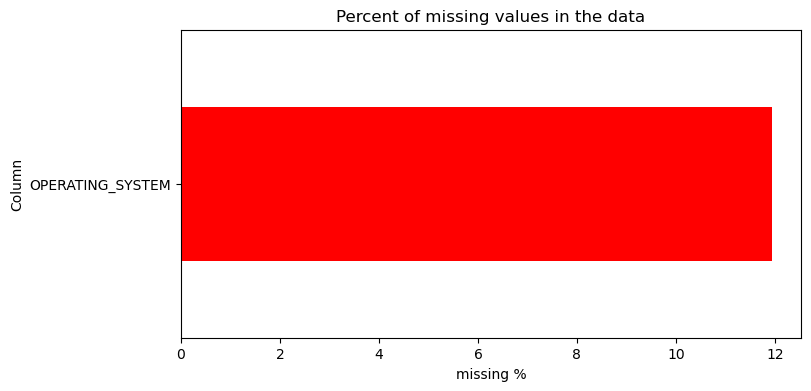

In [49]:
# vizualising null values
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
missing_percent= data1.isnull().mean() * 100
plt.figure(figsize=(8,4))
missing_percent[missing_percent > 0]. sort_values(ascending= False).plot(kind= 'barh', color= 'red')
plt.title('Percent of missing values in the data')
plt.xlabel('missing %')
plt.ylabel('Column')
plt.show()

### Observation:-Above dataset contains null values in operating system feature which is 11% other features do not have any null values.

In [50]:
data1.head()

,MODEL,OPERATING_SYSTEM,SCREAN_SIZE,LAUNCH_YEAR,DISPLAY_TYPE,RATING,PRICE,ORG_PRICE,DISCOUNT,count_rating,count_review
0,innoq spectra,NaN,32,2024,LED,4.0,6990,24990,72,6037.0,687.0
1,realme techlife,Google,43,2025,QLED,4.3,20499,52999,61,153.0,22.0
2,infinix,Linux,32,2024,LED,4.2,7999,16999,52,55202.0,5606.0
3,coocaa,Coolita,43,2024,LED,4.2,13499,29999,55,28046.0,3205.0
4,foxsky,Android,32,2023,LED,4.1,6999,22499,68,6693.0,1574.0


In [51]:
data1['SCREAN_SIZE'].nunique()

6

In [52]:
## separate num and cat
numerical_columns= data1.select_dtypes(include=['float64','int32','int64']).columns.to_list()
categorical_columns= data1.select_dtypes(include=['object']).columns.to_list()
print(numerical_columns)
print('-'*80)
print(categorical_columns)

['RATING', 'PRICE', 'ORG_PRICE', 'DISCOUNT', 'count_rating', 'count_review']
--------------------------------------------------------------------------------
['MODEL', 'OPERATING_SYSTEM', 'SCREAN_SIZE', 'LAUNCH_YEAR', 'DISPLAY_TYPE']


# Distribution of Data

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
        <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

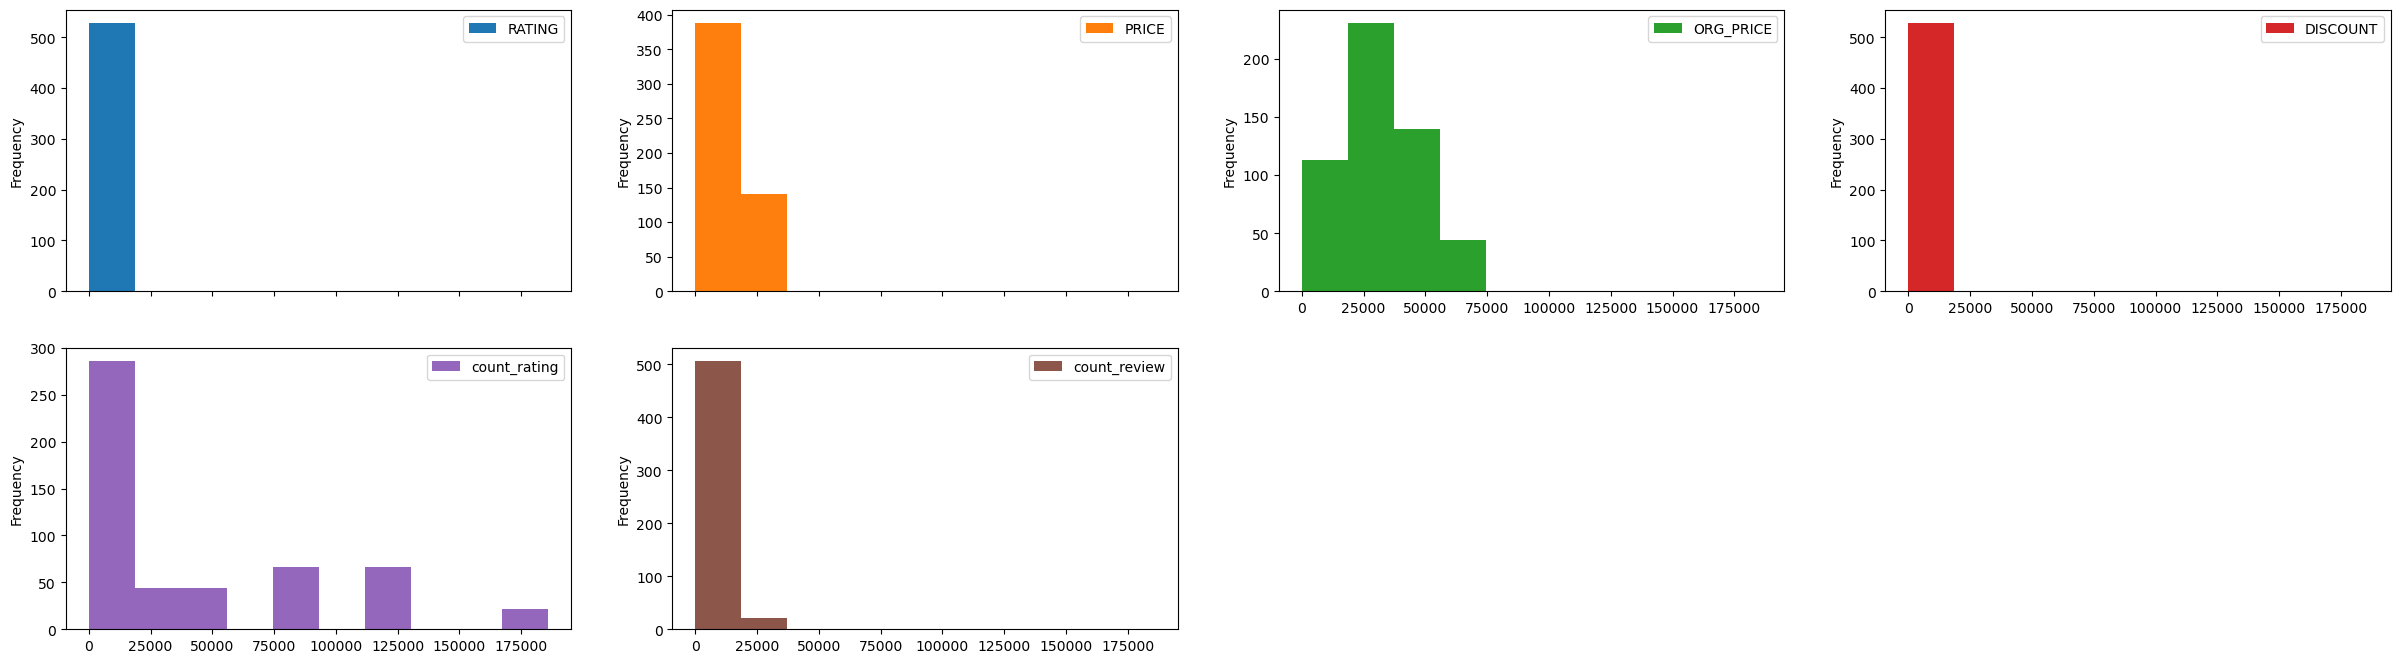

In [53]:
# distribution of numerical data given by histogram and box plot:which gives shape,central tendency and distribution are givenby these plots.

data1[numerical_columns].plot(kind= 'hist', subplots= True, figsize=(30,30), layout=(7,4),bins=10)

### Observations:-the histogram for 'Price' is right-skewed, it suggests that while most products are priced lower, there are a few high-priced items.Discount: A uniform distribution in 'Discount' indicates that discounts are evenly spread across different ranges.

RATING             Axes(0.125,0.786098;0.168478x0.0939024)
PRICE           Axes(0.327174,0.786098;0.168478x0.0939024)
ORG_PRICE       Axes(0.529348,0.786098;0.168478x0.0939024)
DISCOUNT        Axes(0.731522,0.786098;0.168478x0.0939024)
count_rating       Axes(0.125,0.673415;0.168478x0.0939024)
count_review    Axes(0.327174,0.673415;0.168478x0.0939024)
dtype: object

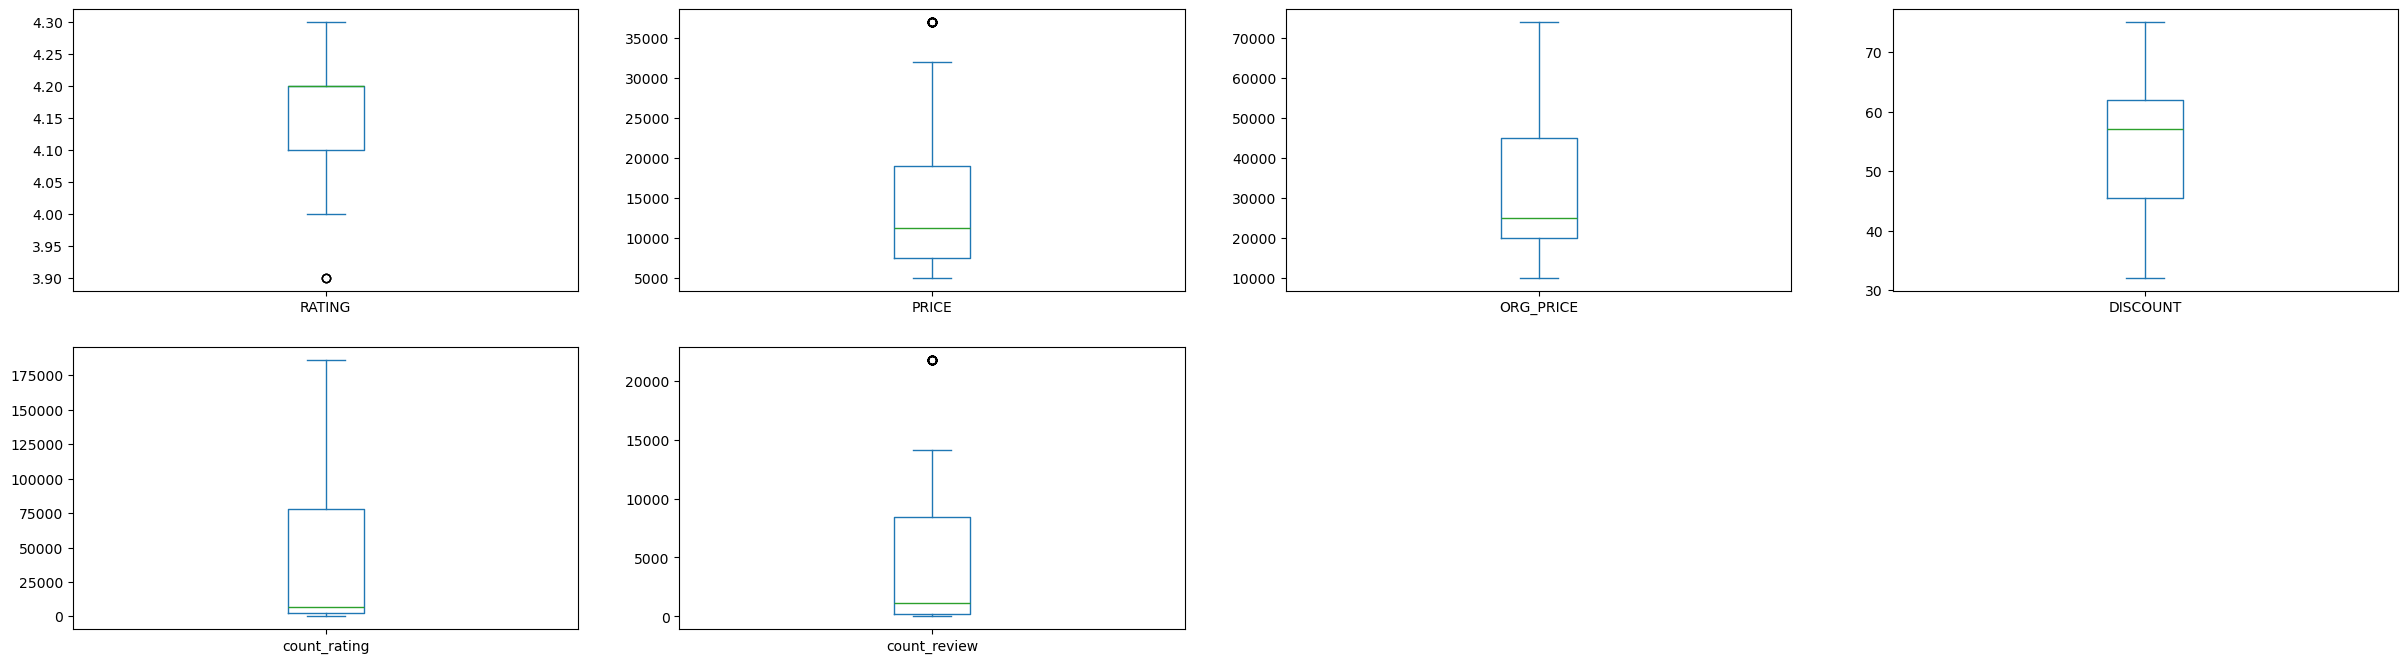

In [54]:
## box plot: Finding outliers and missing values also distribution of data.
data1[numerical_columns].plot(kind= 'box', subplots= True, figsize=(30,30), layout=(7,4))

### Observation:-Maximum distribution of TVs is below 10000 and maximum discount for TVs having high prices and count of reviews and count of rating are maximum for tvs having lower prices.

In [55]:
def iqr(data, column):
    Q1= data[column].quantile(0.25)
    Q3= data[column].quantile(0.75)
    IQR= Q3- Q1
    lower_bound= Q1-1.5 * IQR
    upper_bound= Q3+ 1.5 * IQR
    ##Identify the outlier
    outliers= data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f'{column}- {len(outliers)}')
    #remove outlier 
    cleaned_data= data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

for i in numerical_columns:
    data= iqr(data,i)

RATING- 0
PRICE- 0
ORG_PRICE- 0
DISCOUNT- 36
count_rating- 0
count_review- 0


# Univariant Analysis

### Numerical data

In [56]:
def numerical_analysis(data):
  # Stat Analysis
  for col in data.columns:
    print("*"*10 , col , "*"*10)
    print(data[col].agg({ "Minimum" : "min",
                          "Max" : "max",
                          "Mean" : "mean",
                          "Median" : "median",
                          "STD" : "std",
                          "Skew"  : "skew",
                          "Kurtosis" : "kurt",
                          "75th Percentile" : lambda x : x.quantile(0.75),
                          "95th Percentile" : lambda x : x.quantile(0.95)
                          }))
    print()

    # Viz Analysis
    plt.figure(figsize=(8, 4))

    ## Subplot 1
    plt.subplot(1, 3, 1)
    data[col].plot(kind="hist")

    ## subplot 2 kde
    plt.subplot(1,3,2)
    data[col].plot(kind= 'kde')
    plt.title(f'{col}- KDE')
    plt.xlabel(col)
    plt.ylabel('density')
    plt.tight_layout()
    plt.show()
      
      ## Subplot 3
    plt.subplot(1, 3, 3)
    data[col].plot(kind="box")

    plt.tight_layout()
    plt.show()


********** RATING **********
Minimum            3.900000
Max                4.300000
Mean               4.161553
Median             4.200000
STD                0.104451
Skew              -0.153506
Kurtosis          -1.039782
75th Percentile    4.200000
95th Percentile    4.300000
Name: RATING, dtype: float64



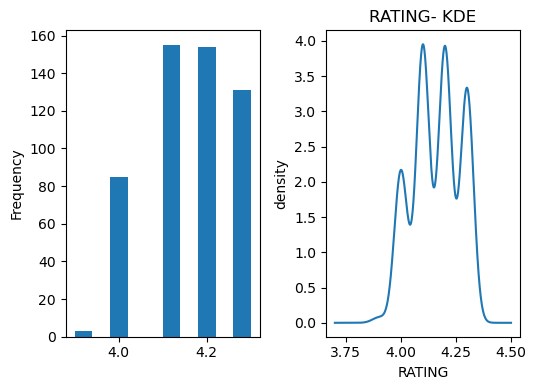

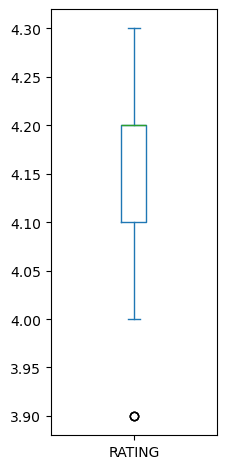

********** PRICE **********
Minimum             4985.000000
Max                36990.000000
Mean               14073.445076
Median             11244.500000
STD                 8743.186709
Skew                   1.113688
Kurtosis               0.290281
75th Percentile    18999.000000
95th Percentile    31999.000000
Name: PRICE, dtype: float64



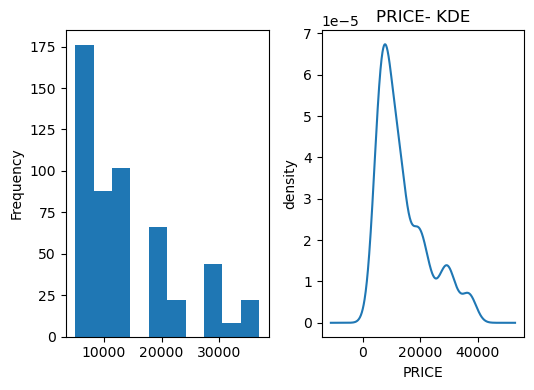

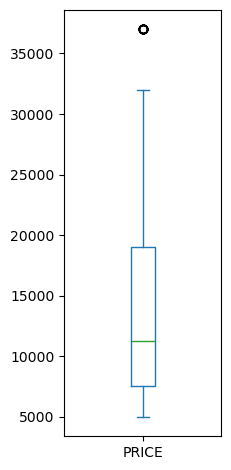

********** ORG_PRICE **********
Minimum             9990.000000
Max                73990.000000
Mean               31675.642045
Median             24990.000000
STD                17294.157899
Skew                   0.834376
Kurtosis              -0.366200
75th Percentile    44999.000000
95th Percentile    62990.000000
Name: ORG_PRICE, dtype: float64



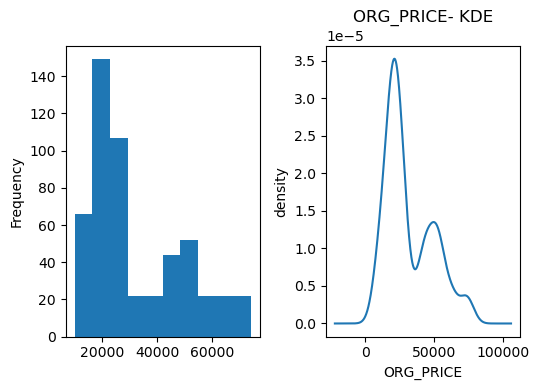

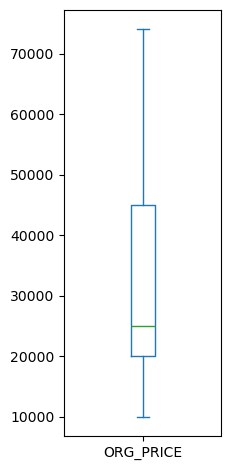

********** DISCOUNT **********
Minimum            32.000000
Max                75.000000
Mean               54.818182
Median             57.000000
STD                12.030208
Skew               -0.405825
Kurtosis           -0.841879
75th Percentile    62.000000
95th Percentile    72.000000
Name: DISCOUNT, dtype: float64



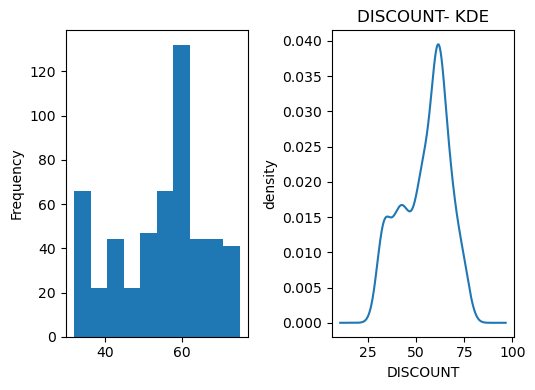

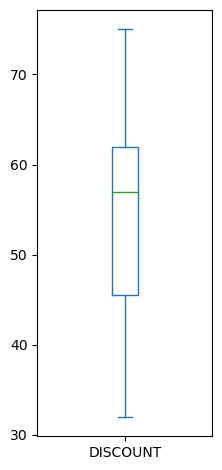

********** count_rating **********
Minimum                32.000000
Max                185977.000000
Mean                41663.060606
Median               7107.000000
STD                 52613.936423
Skew                    1.220091
Kurtosis                0.426689
75th Percentile     77885.000000
95th Percentile    127517.000000
Name: count_rating, dtype: float64



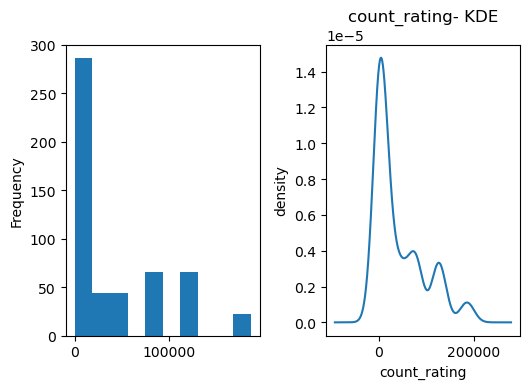

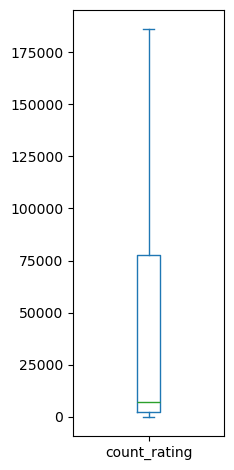

********** count_review **********
Minimum                6.000000
Max                21730.000000
Mean                4480.312500
Median              1130.500000
STD                 5643.861729
Skew                   1.398235
Kurtosis               1.420324
75th Percentile     8435.000000
95th Percentile    14099.000000
Name: count_review, dtype: float64



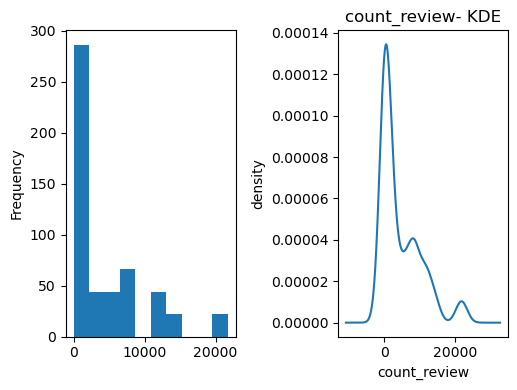

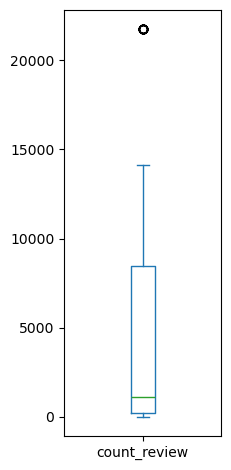

In [57]:
numerical_analysis(data1[numerical_columns])

In [58]:
### Observations:secreen size = maximum TVs with prices below the 20000.distribution of prices is right skewed.For discount 


# Univariate Analysis:-
### Categorical columns

In [59]:
def categorical(data, categorical_columns):
    for column_name in categorical_columns:
        if column_name in data:
            print(f'---{column_name}---')
            
        ### non-visual anallysis
            print(data[column_name].agg(['count','unique']))
           
        ## Visual analysis
            ## Bar plot
            plt.figure(figsize=(8,4))
            data[column_name].value_counts().plot(kind='bar')
            plt.title(f'Bar plot of {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Count')
            plt.show()
            
            ## Count plot
            plt.figure(figsize=(8,4))
            sns.countplot(x= data[column_name])
            plt.title(f'Count plot of {column_name}')
            plt.xlabel(column_name)
            plt.ylabel('Count')
            plt.show()
            
            ## Pie 
            plt.figure(figsize=(8,4))
            data[column_name].value_counts().plot(kind='pie', autopct= '%1.1f%%')
            plt.title(f'Pieplot of {column_name}')
            plt.show()

---MODEL---
count                                                   528
unique    [innoq spectra , realme techlife , infinix , c...
Name: MODEL, dtype: object


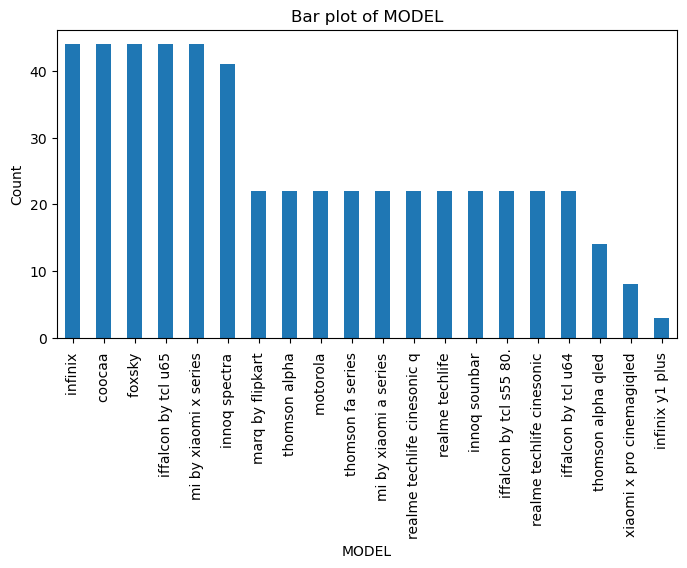

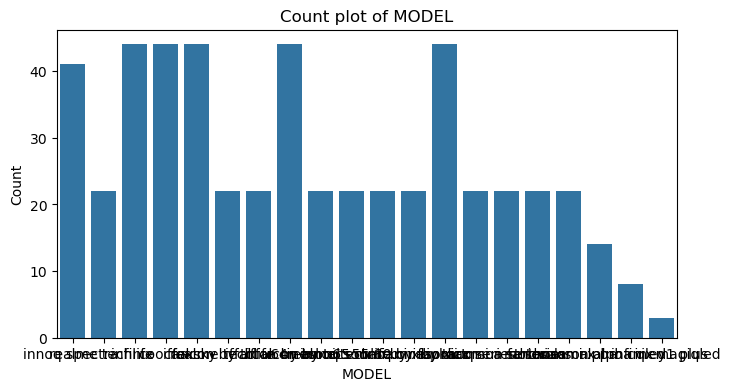

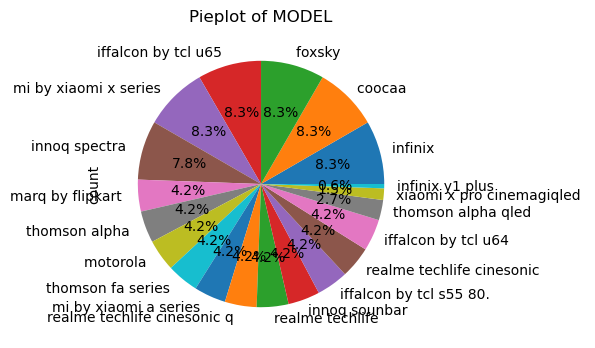

---OPERATING_SYSTEM---
count                                            465
unique    [nan,  Google,  Linux,  Coolita,  Android]
Name: OPERATING_SYSTEM, dtype: object


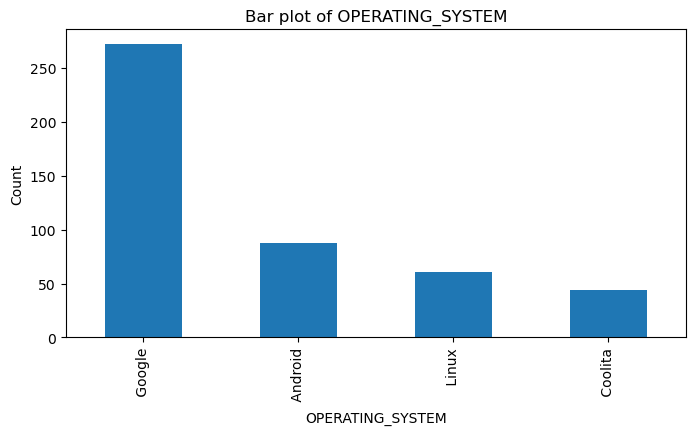

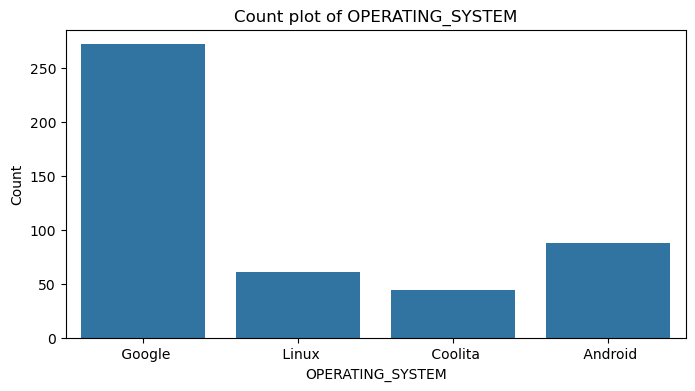

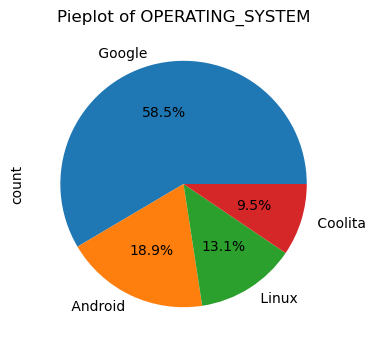

---SCREAN_SIZE---
count                          528
unique    [32, 43, 50, 55, 24, 40]
Name: SCREAN_SIZE, dtype: object


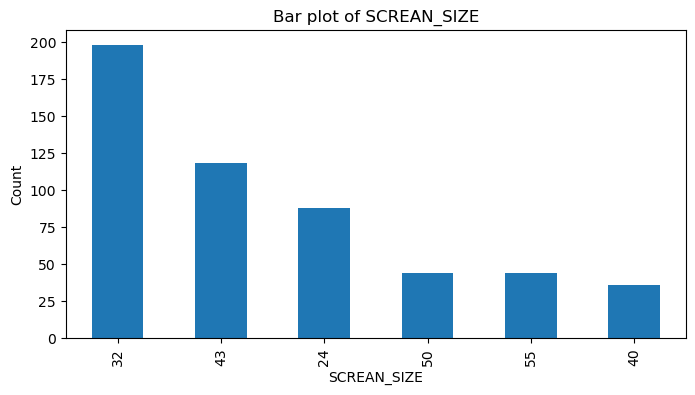

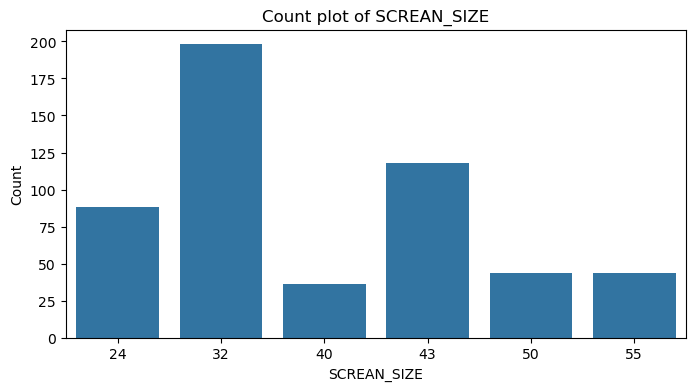

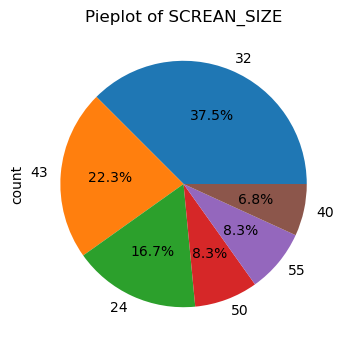

---LAUNCH_YEAR---
count                    528
unique    [2024, 2025, 2023]
Name: LAUNCH_YEAR, dtype: object


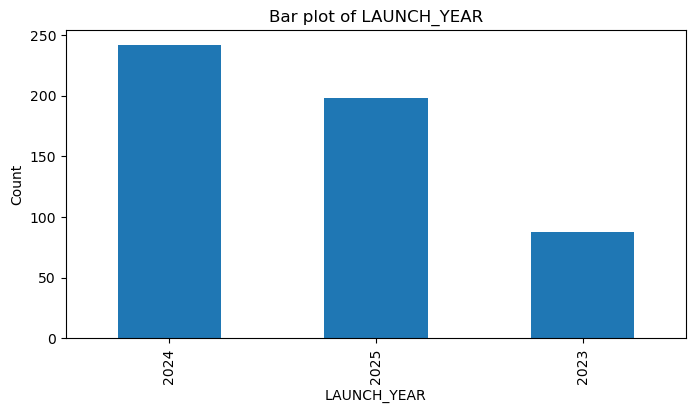

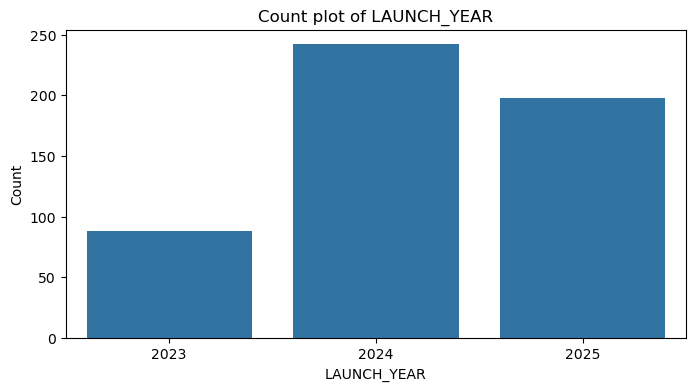

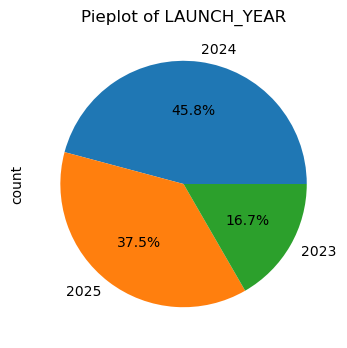

---DISPLAY_TYPE---
count             528
unique    [LED, QLED]
Name: DISPLAY_TYPE, dtype: object


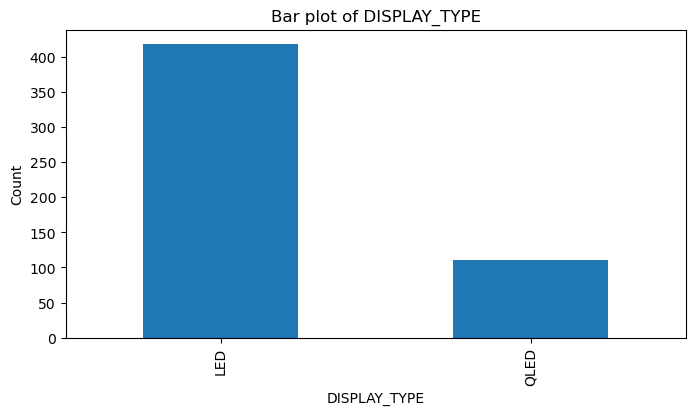

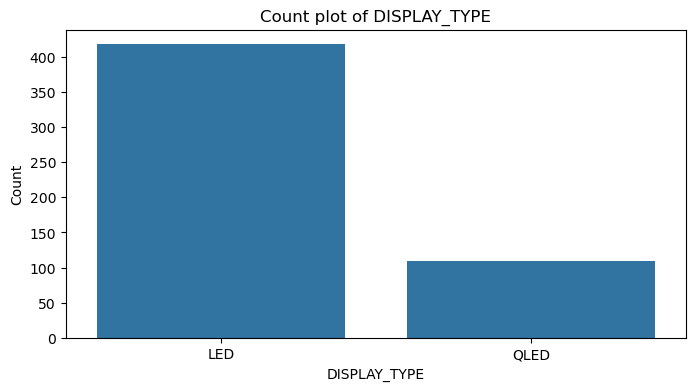

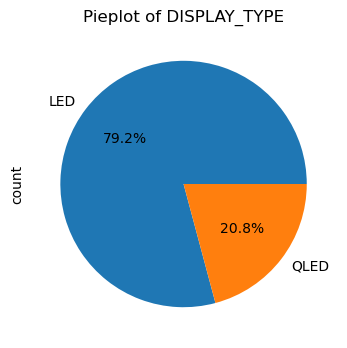

In [60]:
categorical(data1,categorical_columns)

### Observation:-TVs having LED display having more distribution of 79% and TVs having QLED display are produced nearly 21%.

# Bivariant Analysis

## Numerical vs Numerical

In [61]:
data1.columns

Index(['MODEL', 'OPERATING_SYSTEM', 'SCREAN_SIZE', 'LAUNCH_YEAR',
       'DISPLAY_TYPE', 'RATING', 'PRICE', 'ORG_PRICE', 'DISCOUNT',
       'count_rating', 'count_review'],
      dtype='object')

In [62]:
def plot_numerical_relationship(data, x_col, y_col, figsize=(8, 5), scatter_kws=None, line_kws=None, ci=95):
       
    # Create the plot
    plt.figure(figsize=figsize)
    sns.regplot(x=x_col, y=y_col, data=data)

    # Set plot title and labels
    plt.title(f'Relationship between {x_col} and {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)

    # Display the plot
    plt.tight_layout()
    plt.show()

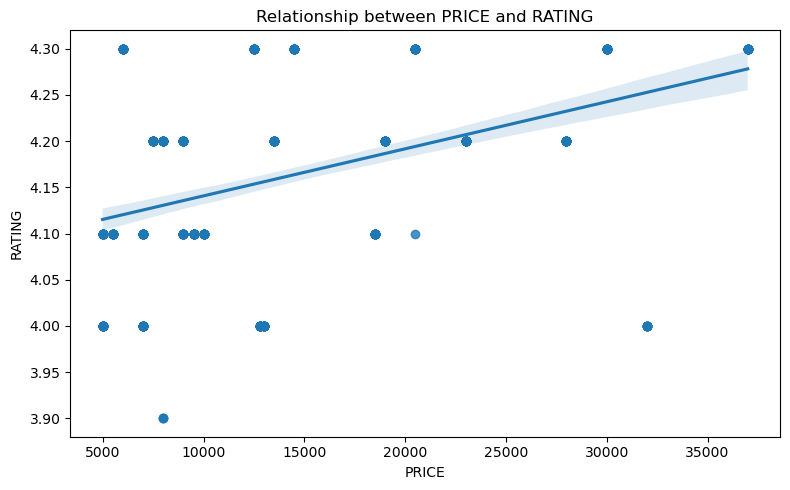

In [63]:
plot_numerical_relationship(data1, x_col='PRICE', y_col='RATING')

### Observation:- As price of TVs increaseses number of Rating also increaseses which shows that higher price of TVs give more features to the customer as a result customers giving more ratings.It shows positive relation between price and ratings. 

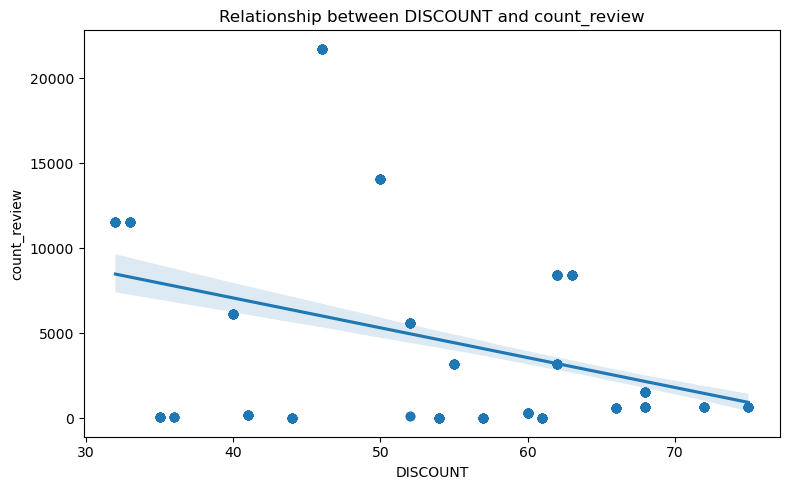

In [64]:
plot_numerical_relationship(data1, x_col='DISCOUNT', y_col='count_review')

### Observation:-Above plot shows negative relation between discount on TV prices and count_reviews from the custumors.

## Numerical vs Categorical Analysis

In [65]:
def boxplot_numerical_vs_categorical(data, numerical_col, categorical_col, figsize=(10, 6), palette='Set2',showmeans=True):

    # Create the box plot
    plt.figure(figsize=figsize)
    sns.boxplot(x=categorical_col, y=numerical_col, data=data, palette=palette,showmeans=showmeans)


    plt.title(f'Distribution of {numerical_col} across {categorical_col}')
    plt.tight_layout()
    plt.show()

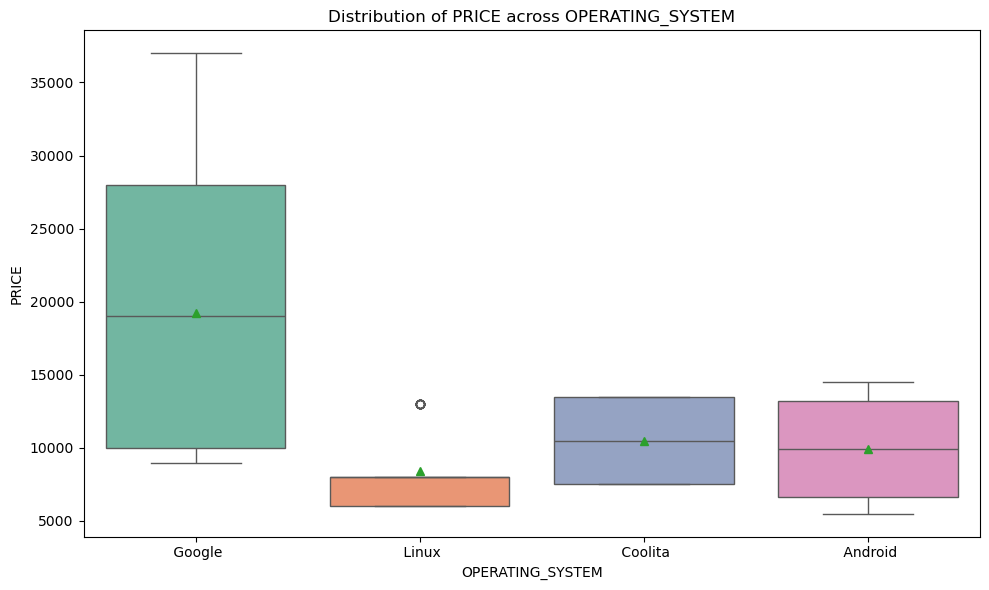

In [66]:
boxplot_numerical_vs_categorical(data1, numerical_col='PRICE', categorical_col='OPERATING_SYSTEM')

### Observation:- Above boxplot shows distribution of price across operating system of TVs.TVs having Google operating system has highes prices compaired to linux,coolita and Android.out of wich linux has list prices and coolita and Android prices has no difference in there TV prices

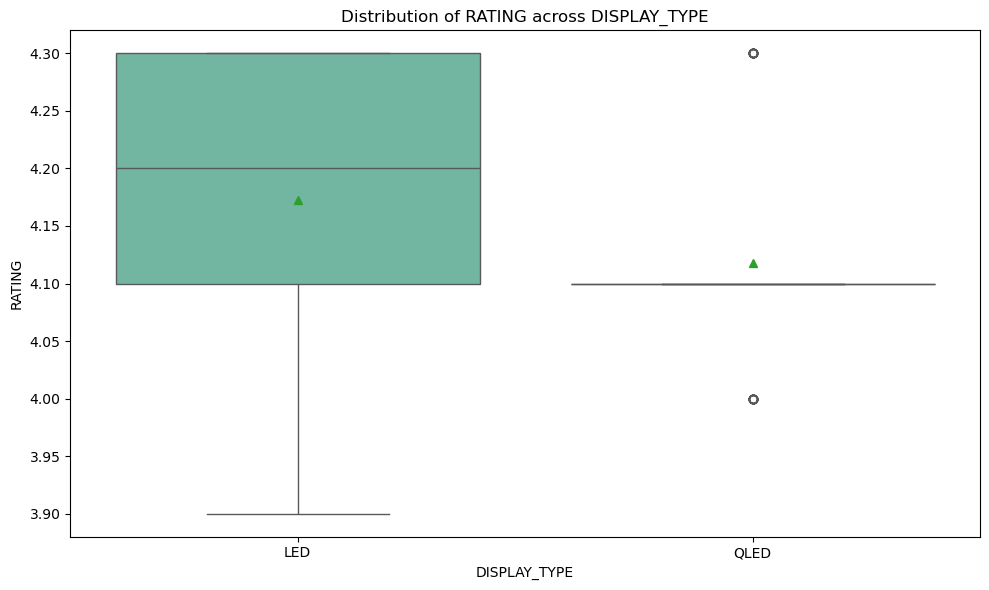

In [67]:
boxplot_numerical_vs_categorical(data1, numerical_col='RATING', categorical_col='DISPLAY_TYPE')

### Observation:-Above boxplot shows distribution of ratings across display types.Tvs with LED display have high rating distribution between (4.10 -4.30) compaired to TVs having QLED and OLED.

## CATEGORICAL V/S CATEGORICAL VISUAL ANALYSIS

<Axes: xlabel='DISPLAY_TYPE'>

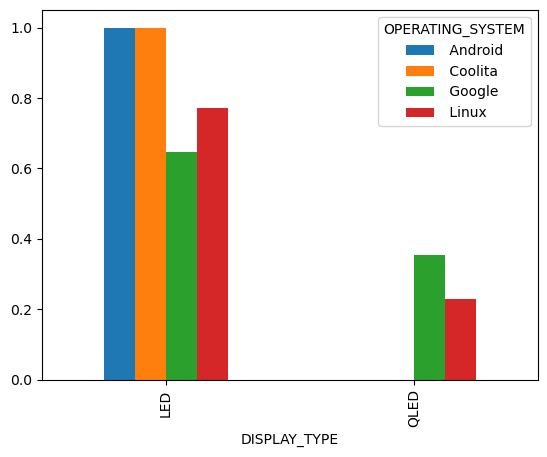

In [68]:
# compare display type across operating system
proportions = pd.crosstab(data1["DISPLAY_TYPE"], df["OPERATING_SYSTEM"], normalize="columns")
 
proportions.plot(kind="bar")

### Observation:- Above bar plot shows corelation between display type and operating system which shows that TVs having android and coolita operating system poseses highest number of TVs with LED display compaired to Google and Linux operating system.TVs with QLED displays are only operated by Google and Linux operating systems.

<Axes: xlabel='MODEL'>

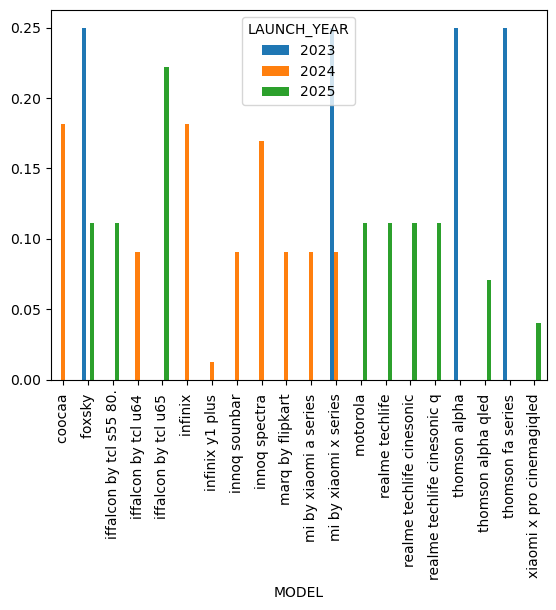

In [69]:
# compare model across launch year
proportions = pd.crosstab(data1["MODEL"], df["LAUNCH_YEAR"], normalize="columns")
 
proportions.T
proportions.plot(kind="bar")

### Observation:-This plot shows correlation of TV model across launch year.In 2023 nearly 25% of tv launched are foxsky,mi by xiami x series,thomson alpha,thomson fa series and in 2025 TVs by iffalcon by tcl u64 launched 22% thenafter by motorola,foxsky,realme techlife, realme techlife cinesonic, realme techlife cinesonic q,iffalcon by tcl u64 have lauched nearly 12% of TVs.